In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')


In [32]:
#read in the data
data = pd.read_csv('C:\\Users\\Quang Thai\\Documents\\GitHub\\IS403.N21.HTTT_Nhom15\\Datasets\\BTC-USD.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-01,1/1/2019,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
2019-01-02,1/2/2019,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2019-01-03,1/3/2019,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
2019-01-04,1/4/2019,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09
2019-01-05,1/5/2019,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5.137610e+09
...,...,...,...,...,...,...,...
2023-03-27,3/27/2023,27994.068360,28037.925780,26606.689450,27139.888670,27139.888670,1.818890e+10
2023-03-28,3/28/2023,27132.888670,27460.718750,26677.818360,27268.130860,27268.130860,1.778360e+10
2023-03-29,3/29/2023,27267.031250,28619.542970,27259.662110,28348.441410,28348.441410,2.068495e+10


In [33]:
future_day= 30

In [34]:
#Create a new column
#data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
#Show the data
data[['Close', str(future_day)+'_Day_Price_Forecast']]
#data



,Close,30_Day_Price_Forecast
Date,,
2019-01-01,3843.520020,3457.792725
2019-01-02,3943.409424,3487.945313
2019-01-03,3836.741211,3521.060791
2019-01-04,3857.717529,3464.013428
2019-01-05,3845.194580,3459.154053
...,...,...
2023-03-27,27139.888670,NaN
2023-03-28,27268.130860,NaN
2023-03-29,28348.441410,NaN


In [35]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_day]
print(X)

[[ 3843.52002 ]
 [ 3943.409424]
 [ 3836.741211]
 ...
 [23522.87109 ]
 [23147.35352 ]
 [23646.55078 ]]


In [36]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[ 3457.792725  3487.945313  3521.060791 ... 28348.44141  28033.5625
 28478.48438 ]


In [37]:
val = np.array(data[['Close']])
val = val[- future_day:]
val


array([[23475.4668 ],
       [22362.67969],
       [22353.34961],
       [22435.51367],
       [22429.75781],
       [22219.76953],
       [21718.08008],
       [20363.02148],
       [20187.24414],
       [20632.41016],
       [22163.94922],
       [24197.5332 ],
       [24746.07422],
       [24375.96094],
       [25052.78906],
       [27423.92969],
       [26965.87891],
       [28038.67578],
       [27767.23633],
       [28175.81641],
       [27307.4375 ],
       [28333.97266],
       [27493.28516],
       [27494.70703],
       [27994.33008],
       [27139.88867],
       [27268.13086],
       [28348.44141],
       [28033.5625 ],
       [28478.48438]])

In [38]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.6)]
Y_train = Y[:int(Y.shape[0]*0.6)]

X_test = X[int(X.shape[0]*0.6):int(X.shape[0]*0.9)]
Y_test = Y[int(Y.shape[0]*0.6):int(Y.shape[0]*0.9)]

X_val = X[int(X.shape[0]*0.9):]
Y_val = Y[int(Y.shape[0]*0.9):]



In [39]:
len(X_test)

456

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Close']])

c:\APP\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C':[0.01, 0.1, 1, 10 ,100],
              'gamma': [0.01, 0.1, 1, 10 ,100],
              'kernel': ['linear', 'rbf','sigmoid']}

In [42]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [43]:
X_Grid.shape

(1065, 1)

In [44]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=7, scoring='r2')

In [45]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=7, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='r2')

In [46]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}


In [47]:
grid_search.best_score_

-0.4416734612539289

In [48]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_Grid, Y_Grid)

SVR(C=100, gamma=0.01, kernel='linear')

In [49]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  0.8744322275368961


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

X_test_pred = svr_linear.predict(X_test_scaled)

val_mse = mean_squared_error(Y_test, X_test_pred)
val_rmse = np.sqrt(val_mse)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)

# Tính toán R2 giữa giá trị thực tế (y_true) và giá trị dự đoán (y_pred)
r2 = r2_score(Y_test, X_test_pred)

print("MAPE:", mape)
print("RMSE:", val_rmse)
print("R2-quare:", r2)

MAPE: 0.15447857608385251
RMSE: 7694.50404512175
R2-quare: 0.6758009493419326


In [51]:
from sklearn.metrics import mean_squared_error
# Tính toán giá trị RMSE 
X_val_pred = svr_linear.predict(X_val_scaled)
rmse = mean_squared_error(Y_val, X_val_pred, squared= False)
rmse
# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)
# Tính toán R2 giữa giá trị thực tế (y_true) và giá trị dự đoán (y_pred)
r2 = r2_score(Y_val, X_val_pred)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R2-quare:", r2)

MAPE: 0.12114034570322264
RMSE: 3262.7271909661677
R2-quare: 0.22337598137064385


Dự đoán

In [52]:
# 13. Dự báo 30 ngày tiếp theo
# Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
x_input = Y_val[-30:].reshape(-1, 1)
x_input = scaler.transform(x_input)
# Dự đoán giá cho 30 ngày tiếp theo
i=0
lst_output = []
for i in range(future_day):
    # Dự đoán giá cho ngày tiếp theO
    
    yhat = svr_linear.predict(x_input)
    print("{} day output {}".format(i,yhat[0]))
    print(x_input.shape)
    # Lưu giá dự đoán vào danh sách kết quả
    
    lst_output.append(yhat[0])
    
    # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
    # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
    # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
    yhat = yhat.reshape(-1,1)
    yhat = scaler.transform(yhat)
    x_input = np.append(x_input[1:], yhat[0]).reshape(-1, 1)
    i=i+1

0 day output 23059.258835290842
(30, 1)
1 day output 22039.915700291065
(30, 1)
2 day output 22031.36909428571
(30, 1)
3 day output 22106.633598836557
(30, 1)
4 day output 22101.36107516668
(30, 1)
5 day output 21909.00612270104
(30, 1)
6 day output 21449.444997159855
(30, 1)
7 day output 20208.174614874046
(30, 1)
8 day output 20047.157810125547
(30, 1)
9 day output 20454.941942727666
(30, 1)
10 day output 21857.873206727512
(30, 1)
11 day output 23720.691216417203
(30, 1)
12 day output 24223.169649154235
(30, 1)
13 day output 23884.135859357513
(30, 1)
14 day output 24504.12875062743
(30, 1)
15 day output 26676.1577951673
(30, 1)
16 day output 26256.570873393634
(30, 1)
17 day output 27239.28186533149
(30, 1)
18 day output 26990.635976608326
(30, 1)
19 day output 27364.90639716136
(30, 1)
20 day output 26569.447793684994
(30, 1)
21 day output 27509.781806164618
(30, 1)
22 day output 26739.689284329826
(30, 1)
23 day output 26740.99175576425
(30, 1)
24 day output 27198.66000293252
(30

In [53]:
Y_test_pred= Y_test.reshape(-1,1)
print(Y_test_pred.shape)
Y_test_pred

(456, 1)


array([[41626.19531],
       [39974.89453],
       [39201.94531],
       [38152.98047],
       [39747.50391],
       [40869.55469],
       [42816.5    ],
       [44555.80078],
       [43798.11719],
       [46365.40234],
       [45585.03125],
       [45593.63672],
       [44428.28906],
       [47793.32031],
       [47096.94531],
       [47047.00391],
       [46004.48438],
       [44695.35938],
       [44801.1875 ],
       [46717.57813],
       [49339.17578],
       [48905.49219],
       [49321.65234],
       [49546.14844],
       [47706.11719],
       [48960.78906],
       [46942.21875],
       [49058.66797],
       [48902.40234],
       [48829.83203],
       [47054.98438],
       [47166.6875 ],
       [48847.02734],
       [49327.72266],
       [50025.375  ],
       [49944.625  ],
       [51753.41016],
       [52633.53516],
       [46811.12891],
       [46091.39063],
       [46391.42188],
       [44883.91016],
       [45201.45703],
       [46063.26953],
       [44963.07422],
       [47

In [54]:
print(X.shape)

(1521, 1)


In [55]:
X_train_pred = svr_linear.predict(X_train_scaled)

In [56]:
# Tạo biểu đồ
actual = np.arange(len(data['Close']))
Predict = np.arange(len(data['Close'])- 30, len(data['Close']))

#index X_train
index_X_train = np.arange(len(X_train_pred))
#index X_val
index_X_test = np.arange(len(X_train_pred), len(X_train_pred) + len(X_test_pred))

#index X_test
index_X_val = np.arange(len(X_train_pred) + len(X_test_pred),len(X_train_pred) + len(X_test_pred) + len(X_val_pred))

In [57]:
Predict

array([1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531,
       1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542,
       1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550])

In [58]:
X_train_pred= X_train_pred.reshape(-1,1)
print(index_X_train.shape)

(912,)


In [59]:
lst_output = np.array(lst_output)

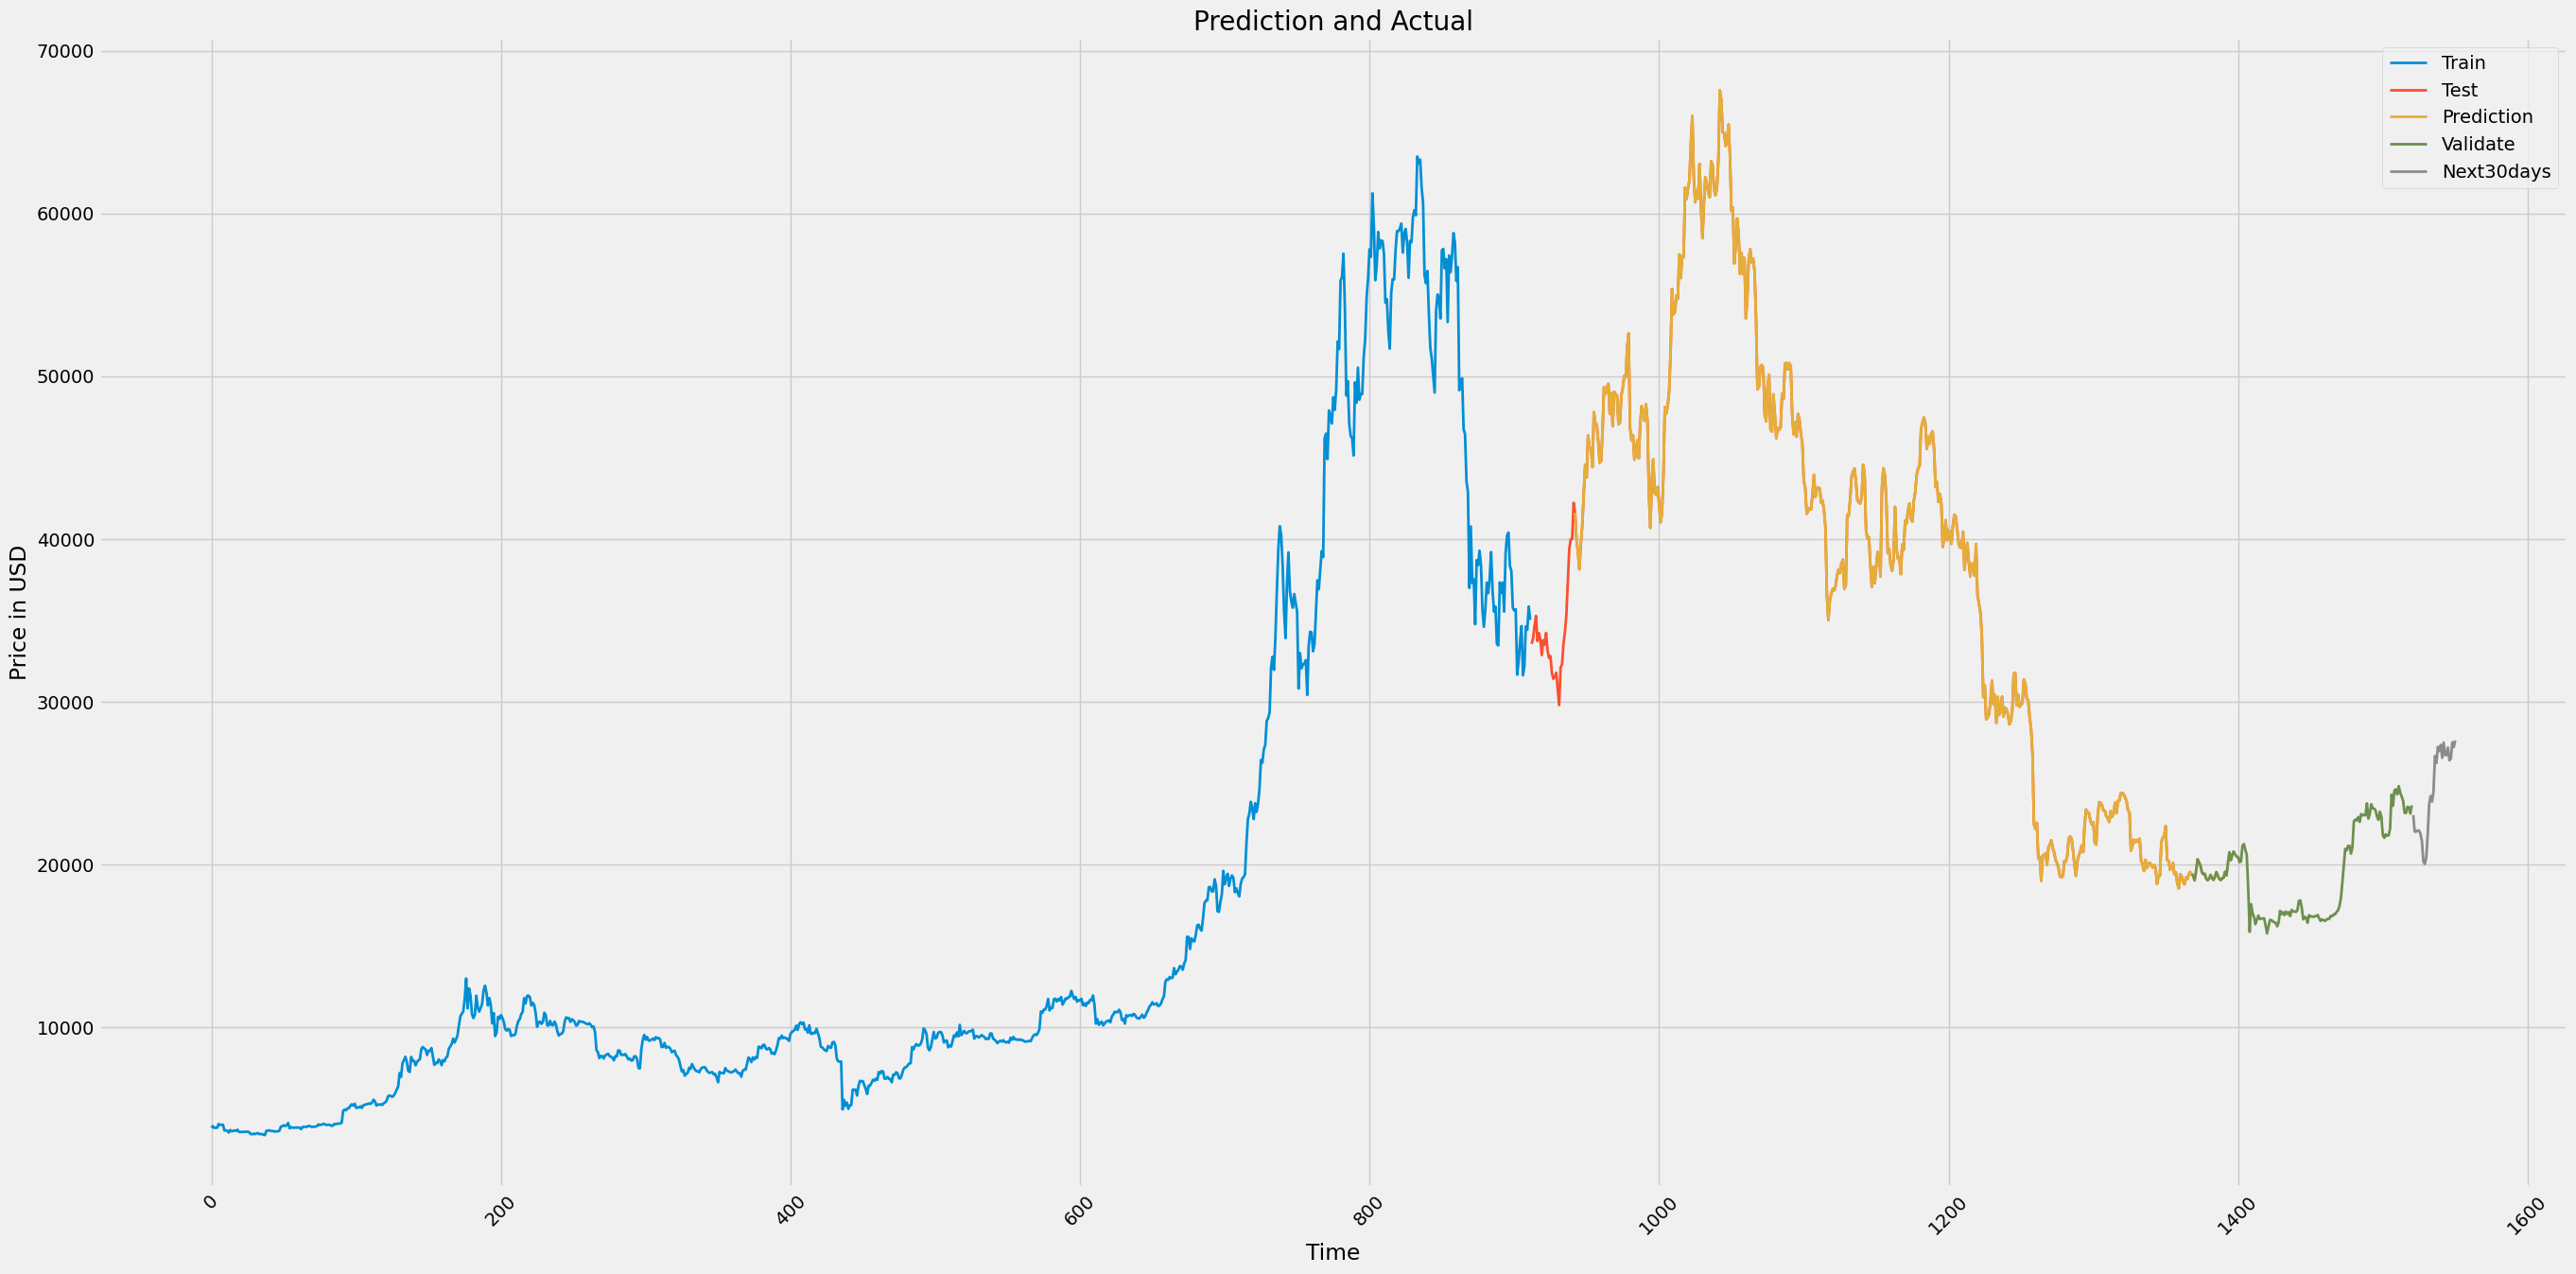

In [60]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(30,15))
plt.grid(True)

# last_30_days = last_30_days.reshape(-1, 1)
# aX_pred = np.concatenate([X,last_30_days])

# plt.plot(actual, data['Close'], label = 'Actual', lw=2)

plt.plot(index_X_train, X_train, label = 'Train', lw=2)
plt.plot(index_X_test, X_test, label = 'Test',lw=2)
plt.plot(index_X_test+30, Y_test_pred, label = 'Prediction', lw=2)
plt.plot(index_X_val, X_val, label = 'Validate', lw=2)

plt.plot(Predict, lst_output[-30:], label = 'Next30days', lw=2)

plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()